In [268]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
# Функция расчета среднеквадратичной ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Функция для стандартизации
def calc_std_feat(x):
    std = (x - x.mean()) / x.std()
    return std

# Функция для нормализации
def calc_norm_feat(x):
    norm = (x - x.min()) / (x.max() - x.min())
    return norm

**1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.**

In [270]:
# Генерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [271]:
# Метод градиентного спуска

def model_GD(X, y, coef, iterations, alpha, diff):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:
      new_w = w - 2 * alpha * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [272]:
# Метод стохастического градиентного спуска

def model_SGD(X, y, coef, iterations, alpha, diff):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:      
      train_index = np.random.randint(X.shape[0])  # генерируем случайный индекс объекта выборки
      new_w = w - 2 * alpha * np.dot(X[train_index].T, (np.dot(X[train_index], w) - y[train_index])) / y.shape[0]  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [273]:
# Обучим модели на сгенерированных данных ДО стандартизации
GD = model_GD(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6)
SGD = model_SGD(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6)

print(f'Iter: {GD[0]}\nMSE: {GD[1][-1]}\nW: {GD[2][-1]}\n')
print(f'Iter: {SGD[0]}\nMSE: {SGD[1][-1]}\nW: {SGD[2][-1]}\n')

Iter: 8
MSE: 24.213654063709008
W: [40.89018781  6.70032079]

Iter: 7089
MSE: 24.226476902688603
W: [40.77641539  6.72952748]



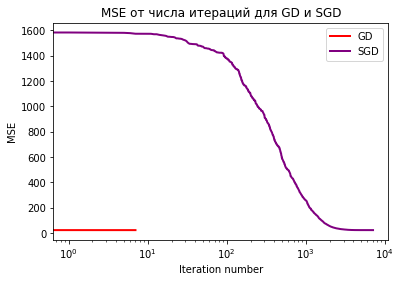

In [274]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(GD[1])), GD[1], label='GD', c='red',linewidth=2)
plt.plot(range(len(SGD[1])), SGD[1], label='SGD', c='purple',linewidth=2)
plt.xscale('log')
plt.title('MSE от числа итераций для GD и SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

**Вывод:** Для достижения сходимости для SGD нужно большее количество итераций.

In [275]:
# Проведем нормализацию данных
X_norm = X.copy().astype(np.float64)
X_norm[:, 0] = calc_norm_feat(X[:, 0])
X_norm[:, 1] = calc_norm_feat(X[:, 1])

In [276]:
X

array([[-0.16711808,  0.14671369],
       [-0.02090159,  0.11732738],
       [ 0.15041891,  0.364961  ],
       ...,
       [ 0.30263547, -0.75427585],
       [ 0.38193545,  0.43004165],
       [ 0.07736831, -0.8612842 ]])

In [277]:
# Обучим модели на сгенерированных данных ПОСЛЕ нормализации
GD_norm = model_GD(X_norm, y, coef, iterations=10000, alpha=0.5, diff=1e-6)
SGD_norm = model_SGD(X_norm, y, coef, iterations=10000, alpha=0.5, diff=1e-6)

print(f'Iter: {GD_norm[0]}\nMSE: {GD_norm[1][-1]}\nW: {GD_norm[2][-1]}\n')
print(f'Iter: {SGD_norm[0]}\nMSE: {SGD_norm[1][-1]}\nW: {SGD_norm[2][-1]}\n')

Iter: 655
MSE: 1112.9153096102848
W: [ 98.56547437 -95.56815496]

Iter: 10000
MSE: 1376.8622754321198
W: [ 27.93876904 -13.83123129]



In [278]:
# Проведем стандартизацию данных
X_st = X.copy().astype(np.float64)
X_st[:, 0] = calc_std_feat(X[:, 0])
X_st[:, 1] = calc_std_feat(X[:, 1])

In [279]:
# Обучим модели на сгенерированных данных ПОСЛЕ стандартизации
GD_st = model_GD(X_st, y, coef, iterations=10000, alpha=0.5, diff=1e-6)
SGD_st = model_SGD(X_st, y, coef, iterations=10000, alpha=0.5, diff=1e-6)

print(f'Iter: {GD_st[0]}\nMSE: {GD_st[1][-1]}\nW: {GD_st[2][-1]}\n')
print(f'Iter: {SGD_st[0]}\nMSE: {SGD_st[1][-1]}\nW: {SGD_st[2][-1]}\n')

Iter: 4
MSE: 27.26419164789097
W: [39.30020801  6.79671367]

Iter: 4768
MSE: 27.353597116566167
W: [39.03565795  6.65804451]



**Вывод:** Нормализация привела к многократному увеличению ошибки и количества итераций для обоих методов. При стандартизации ошибка увеличилась незначительно (GD: 24.21, SGD: 24.22 -->  GD: 27.26, SGD: 27.35), количество итераций уменьшилось вдвое (GD: 8, SGD: 7089 -->  GD: 4, SGD: 4768).

**2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.**

In [280]:
# Метод градиентного спуска c L2-регуляризацией

def model_GD_l2(X, y, coef, iterations, alpha, diff, lambda_):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:
      new_w = w - alpha * (2 *  np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + 2 * lambda_ * w)  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [281]:
# Метод стохастического градиентного спуска c L2-регуляризацией

def model_SGD_l2(X, y, coef, iterations, alpha, diff, lambda_):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:      
      train_index = np.random.randint(X.shape[0])  # генерируем случайный индекс объекта выборки
      new_w = w - alpha * (2 *  np.dot(X[train_index].T, (np.dot(X[train_index], w) - y[train_index])) / y.shape[0] + 2 * lambda_ * w)  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [282]:
# L2-регуляризация - 1e-8
GD_l2 = model_GD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-8)
SGD_l2 = model_SGD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-8)
print(f'L2: {1e-8} \n\nIter: {GD_l2[0]}\nMSE: {GD_l2[1][-1]}\nW: {GD_l2[2][-1]}\n')
print(f'Iter: {SGD_l2[0]}\nMSE: {SGD_l2[1][-1]}\nW: {SGD_l2[2][-1]}\n\n***************\n')

# L2-регуляризация - 1e-6
GD_l2 = model_GD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-6)
SGD_l2 = model_SGD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-6)
print(f'L2: {1e-6} \n\nIter: {GD_l2[0]}\nMSE: {GD_l2[1][-1]}\nW: {GD_l2[2][-1]}\n')
print(f'Iter: {SGD_l2[0]}\nMSE: {SGD_l2[1][-1]}\nW: {SGD_l2[2][-1]}\n\n***************\n')

# L2-регуляризация - 1e-2
GD_l2 = model_GD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-2)
SGD_l2 = model_SGD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-2)
print(f'L2: {1e-2} \n\nIter: {GD_l2[0]}\nMSE: {GD_l2[1][-1]}\nW: {GD_l2[2][-1]}\n')
print(f'Iter: {SGD_l2[0]}\nMSE: {SGD_l2[1][-1]}\nW: {SGD_l2[2][-1]}\n\n***************\n')

# Показатели без L2-регуляризации ДО стандартизации
# Iter: 8
# MSE: 24.213654063709008
# W: [40.89018781  6.70032079]

# Iter: 7089
# MSE: 24.226476902688603
# W: [40.77641539  6.72952748]

L2: 1e-08 

Iter: 8
MSE: 24.213654063709225
W: [40.89018736  6.70032072]

Iter: 7089
MSE: 24.226564578210716
W: [40.77598211  6.72946723]

***************

L2: 1e-06 

Iter: 8
MSE: 24.213654065561222
W: [40.89014362  6.70031448]

Iter: 10000
MSE: 24.21567249869724
W: [40.89836932  6.65675191]

***************

L2: 0.01 

Iter: 8
MSE: 24.394618716212058
W: [40.45308757  6.63788997]

Iter: 10000
MSE: 1353.3063480059516
W: [3.51395923 0.86451225]

***************



**Вывод:** Чем меньше коэффициент L2-регуляризации, тем меньшее влияние он оказывает на модель и полученные результаты. С увеличением значения данного коэффициента, растет число необходимых итераций для сходимости градиентного спуска, как обычного, так и стохастического, а также растет MSE.

Из вариантов выше, оптимальным является коэффициент в значении **1е-6**, т.к. значение MSE для GD остается на прежнем уравне, при этом мы снижаем риск переобучения модели, а для SGD - MSE даже снижается с некоторым увеличением итераций.

**3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.**

In [283]:
# Метод градиентного спуска c L1-регуляризацией

def model_GD_l1(X, y, coef, iterations, alpha, diff, lambda_):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:
      new_w = w - alpha * (2 *  np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + lambda_ * np.sign(w))  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [284]:
# Метод стохастического градиентного спуска c L1-регуляризацией

def model_SGD_l1(X, y, coef, iterations, alpha, diff, lambda_):
  np.random.seed(42)
  w = np.random.randn(X.shape[1])  # начальные веса из нормального распределения
  w_list = [w.copy()]  # список векторов весов после каждой итерации
  errors = []  # список значений ошибок после каждой итерации
  weight_dist = np.inf  # начальная разница весов большим числом
  iter_num = 0  # счетчик итераций

  # Ход градиентного спуска
  while weight_dist > diff and iter_num < iterations:      
      train_index = np.random.randint(X.shape[0])  # генерируем случайный индекс объекта выборки
      new_w = w - alpha * (2 *  np.dot(X[train_index].T, (np.dot(X[train_index], w) - y[train_index])) / y.shape[0] + lambda_ * np.sign(w))  # считаем новые веса
      weight_dist = np.linalg.norm(new_w - w, ord=2)  # корректируем разницу весов
      w_list.append(new_w.copy())
      y_pred = np.dot(X, new_w)  # считаем предсказания
      errors.append(calc_mse(y, y_pred)) 
      iter_num += 1
      w = new_w  # корректируем весы

  w_list = np.array(w_list)
  errors = np.array(errors)

  return [iter_num, errors, w_list]

In [285]:
# L1-регуляризация - 1e-8
GD_l1 = model_GD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-8)
SGD_l1 = model_SGD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-8)
print(f'L1: {1e-8} \n\nIter: {GD_l1[0]}\nMSE: {GD_l1[1][-1]}\nW: {GD_l1[2][-1]}\n')
print(f'Iter: {SGD_l1[0]}\nMSE: {SGD_l1[1][-1]}\nW: {SGD_l1[2][-1]}\n\n***************\n')

# L1-регуляризация - 1e-6
GD_l1 = model_GD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-6)
SGD_l1 = model_SGD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-6)
print(f'L1: {1e-6} \n\nIter: {GD_l1[0]}\nMSE: {GD_l1[1][-1]}\nW: {GD_l1[2][-1]}\n')
print(f'Iter: {SGD_l1[0]}\nMSE: {SGD_l1[1][-1]}\nW: {SGD_l1[2][-1]}\n\n***************\n')

# L1-регуляризация - 1e-2
GD_l1 = model_GD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-2)
SGD_l1 = model_SGD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-2)
print(f'L1: {1e-2} \n\nIter: {GD_l1[0]}\nMSE: {GD_l1[1][-1]}\nW: {GD_l1[2][-1]}\n')
print(f'Iter: {SGD_l1[0]}\nMSE: {SGD_l1[1][-1]}\nW: {SGD_l1[2][-1]}\n\n***************\n')

# Показатели без L1-регуляризации ДО стандартизации
# Iter: 8
# MSE: 24.213654063709008
# W: [40.89018781  6.70032079]

# Iter: 7089
# MSE: 24.226476902688603
# W: [40.77641539  6.72952748]

L1: 1e-08 

Iter: 8
MSE: 24.213654063709008
W: [40.8901878   6.70032078]

Iter: 7089
MSE: 24.226477737426613
W: [40.77641007  6.72952271]

***************

L1: 1e-06 

Iter: 8
MSE: 24.213654063709562
W: [40.89018727  6.7003203 ]

Iter: 7089
MSE: 24.226560869733966
W: [40.77588378  6.72905076]

***************

L1: 0.01 

Iter: 8
MSE: 24.213705081738603
W: [40.88480456  6.69550051]

Iter: 10000
MSE: 72.31074464206743
W: [35.73342808  1.95088488]

***************



**Вывод:** Коэффициент L1-регуляризации в меньшей степени влиет на результаты обучения модели, т.к. в основе расчета лежит сумма модулей весов, а не квадратов.

**4. [\*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).**

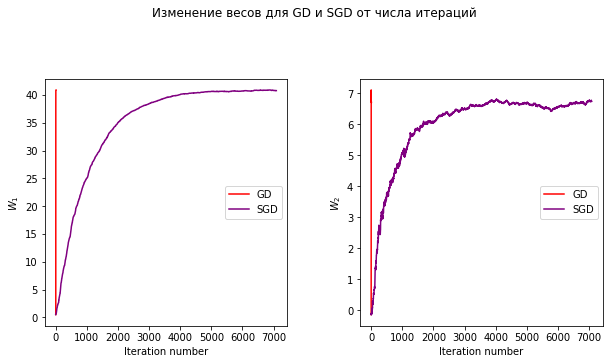

In [286]:
# Визуализируем изменение весов
plt.figure(figsize=(10, 10))
plt.suptitle('Изменение весов для GD и SGD от числа итераций')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Для веса 1
plt.subplot(221)
plt.plot(range(len(GD[2][:, 0])), GD[2][:, 0], label='GD', c='red')
plt.plot(range(len(SGD[2][:, 0])), SGD[2][:, 0], label='SGD', c='purple')
plt.legend(loc='center right')
plt.xlabel('Iteration number')
plt.ylabel('$W_1$')

# Для веса 2
plt.subplot(222)
plt.plot(range(len(GD[2][:, 1])), GD[2][:, 1], label='GD', c='red')
plt.plot(range(len(SGD[2][:, 1])), SGD[2][:, 1], label='SGD', c='purple')
plt.legend(loc='center right')
plt.xlabel('Iteration number')
plt.ylabel('$W_2$')

plt.show()

**5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.**

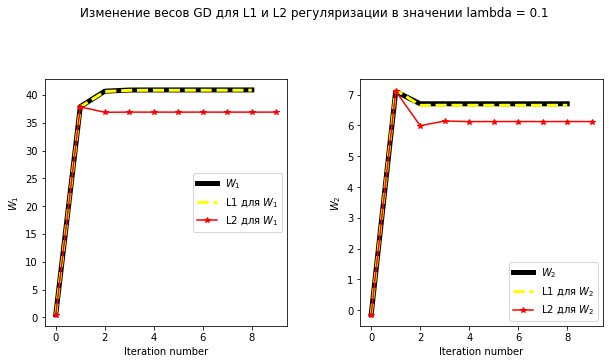

In [287]:
# Визуализируем изменение весов
# Для наглядности возьмем lambda_=0.1

GD_ = model_GD(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6)
GD_l1 = model_GD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=0.1)
GD_l2 = model_GD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=0.1)

plt.figure(figsize=(10, 10))
plt.suptitle('Изменение весов GD для L1 и L2 регуляризации в значении lambda = 0.1')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Для веса 1
plt.subplot(221)
plt.plot(range(len(GD_[2][:, 0])), GD_[2][:, 0], label='$W_1$', c='black', linewidth=5)
plt.plot(range(len(GD_l1[2][:, 0])), GD_l1[2][:, 0], label='L1 для $W_1$', c='yellow', linewidth=3, linestyle='dashed')
plt.plot(range(len(GD_l2[2][:, 0])), GD_l2[2][:, 0], label='L2 для $W_1$', c='red', marker='*')
plt.legend(loc='center right')
plt.xlabel('Iteration number')
plt.ylabel('$W_1$')

# Для веса 2
plt.subplot(222)
plt.plot(range(len(GD_[2][:, 1])), GD_[2][:, 1], label='$W_2$', c='black', linewidth=5)
plt.plot(range(len(GD_l1[2][:, 1])), GD_l1[2][:, 1], label='L1 для $W_2$', c='yellow', linewidth=3, linestyle='dashed')
plt.plot(range(len(GD_l2[2][:, 1])), GD_l2[2][:, 1], label='L2 для $W_2$', c='red', marker='*')
plt.legend(loc='lower right')
plt.xlabel('Iteration number')
plt.ylabel('$W_2$')

plt.show()

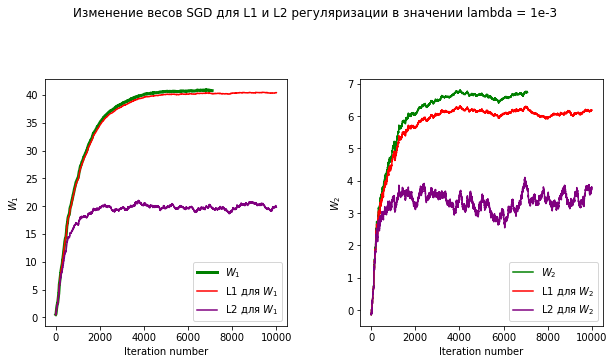

In [288]:
# Визуализируем изменение весов
# Для наглядности возьмем lambda_=1e-3

SGD_ = model_SGD(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6)
SGD_l1 = model_SGD_l1(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-3)
SGD_l2 = model_SGD_l2(X, y, coef, iterations=10000, alpha=0.5, diff=1e-6, lambda_=1e-3)

plt.figure(figsize=(10, 10))
plt.suptitle('Изменение весов SGD для L1 и L2 регуляризации в значении lambda = 1e-3')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Для веса 1
plt.subplot(221)
plt.plot(range(len(SGD_[2][:, 0])), SGD_[2][:, 0], label='$W_1$', c='green', linewidth=3)
plt.plot(range(len(SGD_l1[2][:, 0])), SGD_l1[2][:, 0], label='L1 для $W_1$', c='red')
plt.plot(range(len(SGD_l2[2][:, 0])), SGD_l2[2][:, 0], label='L2 для $W_1$', c='purple')
plt.legend(loc='lower right')
plt.xlabel('Iteration number')
plt.ylabel('$W_1$')

# Для веса 2
plt.subplot(222)
plt.plot(range(len(SGD_[2][:, 1])), SGD_[2][:, 1], label='$W_2$', c='green')
plt.plot(range(len(SGD_l1[2][:, 1])), SGD_l1[2][:, 1], label='L1 для $W_2$', c='red')
plt.plot(range(len(SGD_l2[2][:, 1])), SGD_l2[2][:, 1], label='L2 для $W_2$', c='purple')
plt.legend(loc='lower right')
plt.xlabel('Iteration number')
plt.ylabel('$W_2$')

plt.show()